# Tutorial 1

In [1]:
!pip install numba

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import metropolis
from metropolis import prepare_system, metropolis_loop

## Exercise 1.1: Estimate π with Monte Carlo

a) Estimate π by “shooting” (i.e., drawing random numbers) N times uniformly on a
square and counting the number of points hitting a disc target: the ratio of hits to
N should correspond to the ratio of the areas of the target to the area you shoot
on.

In [3]:
def hit_circle(x, y, r):

    return x**2 + y**2 <= r

def estimate_pi(N, r):
    x = np.random.rand(N)*2-1
    y = np.random.rand(N)*2-1

    num_of_hits = np.sum(hit_circle(x, y, r))
    circle_area = 4*num_of_hits/N
    pi = circle_area/(r**2)

    return pi

In [4]:
N = 1000000
radius = 1
iter = 100

pi = []
for i in range(iter):
    pi += [estimate_pi(N, radius)]

final_pi = np.average(pi)

print(f" For N = {N}, the estimate of π is {final_pi} after 100 repetitions.")

 For N = 1000000, the estimate of π is 3.14141464 after 100 repetitions.


b) Estimate the variance of the error for given N by repeating this a few times.

In [5]:
N = 1000000
radius = 1
iter = 100

pi = []
for i in range(iter):
    pi += [estimate_pi(N, radius)]

error = np.array(pi) - np.pi
variance = np.var(error)

print(f"For N = {N}, the variance of the error is {variance} after 100 repetitions.")

For N = 1000000, the variance of the error is 1.8499495999999363e-06 after 100 repetitions.


c) Plot the variance of the error versus N on a log-log scale. What is the scaling of
the error?

In [33]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6, 10**7]
radius = 1
iter = 100

variance = []
for n in N:
    pi = []
    for i in range(iter):
        pi += [estimate_pi(n, radius)]
    error = np.array(pi) - np.pi
    variance += [np.var(error)]


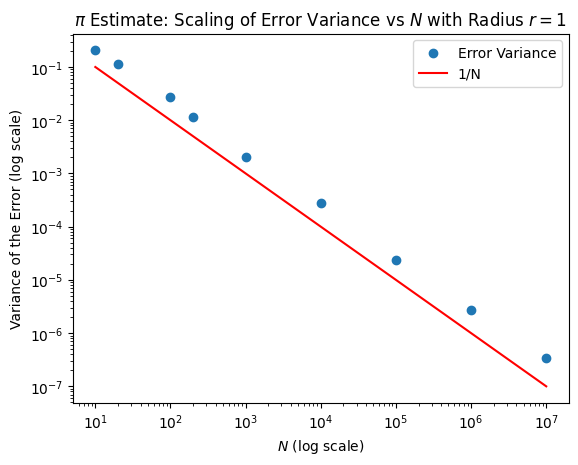

In [34]:
plt.scatter(N, variance, label="Error Variance")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (log scale)")
plt.ylabel("Variance of the Error (log scale)")
plt.title("$\pi$ Estimate: Scaling of Error Variance vs $N$ with Radius $r = 1$")

plt.plot(N, 1/np.array(N), label="1/N", color='r')    # comparing the variance trend with 1/N

plt.legend()
plt.show()

The $\log(\text{error variance})$ scales **linearly decreasing** with $\log(N)$.

It has the same trend as the $\frac{1}{N}$ line. So the Variance(error) ~ $\frac{1}{N}$. The error or the standard deviation is $\sqrt{\text{Variance(error)}}$ ~ $\frac{1}{\sqrt{N}}$.

Now, we turn to a different problem. Consider π given, we use Monte Carlo to estimate
the volume of d-dimension sphere.

d) Generalize your code to estimate the volume of a d-dimensional sphere. Does it run
much slower for large d? How does the error of the estimates scale for d and N?

In [35]:
def hit_d_ball(coord, r):
    
    return np.sum((coord)**2, axis=1) <= r**2

def estimate_d_ball_volume(N, d, r):
    coord = (np.random.rand(N, d)*2-1)

    num_of_hits = np.sum(hit_d_ball(coord, r))
    d_square_volume = (2*r)**d  # length of the sides to the power of the number of dimensions (e.g., for square, it's (2r)^2)
    
    d_ball_volume_estimate = d_square_volume * num_of_hits/N

    return d_ball_volume_estimate

In [36]:
N = 10**6
radius = 1

print(f"For N = {N} and radius r = {radius}, the estimate volume of 2-dimensional sphere (area of circle) is {estimate_d_ball_volume(N, 2, radius)}. And the estimate volume of 3-dimensional sphere (volume of sphere) is {estimate_d_ball_volume(N, 3, radius)}.")

For N = 1000000 and radius r = 1, the estimate volume of 2-dimensional sphere (area of circle) is 3.139836. And the estimate volume of 3-dimensional sphere (volume of sphere) is 4.188136.


In [37]:
import time

N = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1

runtime = []
volume = []
for dimension in d:
    start = time.time()
    volume += [estimate_d_ball_volume(N, dimension, radius)]
    end = time.time()

    runtime += [end - start]

y = 0.015615258044411884 * x + 0.011641602286953878


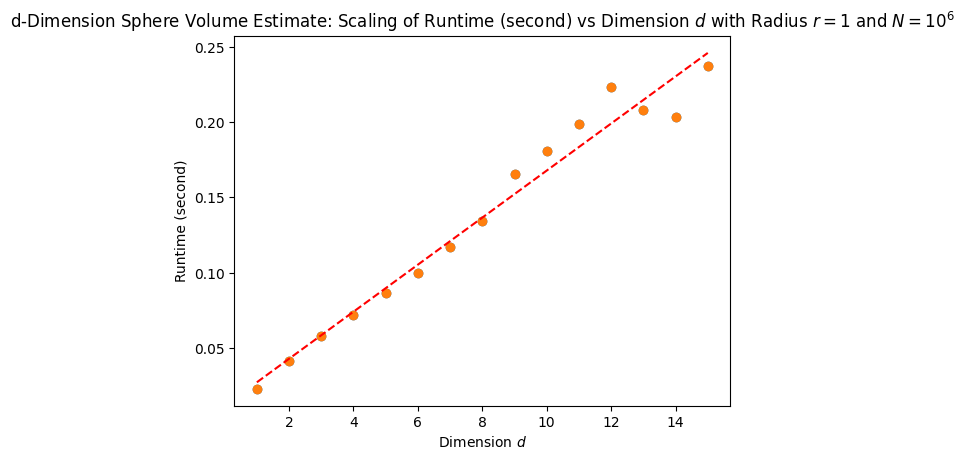

In [39]:
x = d
y = runtime
# define the estimate objective function (linear/polynomial order-1)
def objective(x, a, b):
 return a*x + b
# curve fit
popt, _ = opt.curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print(f"y = {a} * x + {b}")
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x)+1, 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')

plt.scatter(d,runtime)
plt.xlabel("Dimension $d$")
plt.ylabel("Runtime (second)")
plt.title("d-Dimension Sphere Volume Estimate: Scaling of Runtime (second) vs Dimension $d$ with Radius $r = 1$ and $N = 10^6$")
plt.show()

The runtime scales **linearly increasing** with $d$. Runtime ~ $d$.

It does not run much slower as the time complexity is polynomial order-1 $O(d)$.

In [83]:
# correct volume from reference https://en.wikipedia.org/wiki/Volume_of_an_n-ball

correct_volume = [2, np.pi, np.pi*4/3, np.pi**2/2, np.pi**2*8/15, np.pi**3/6,
                  np.pi**3*16/105, np.pi**4/24, np.pi**4*32/945, np.pi**5/120, np.pi**5*64/10395,
                  np.pi**6/720, np.pi**6*128/135135, np.pi**7/5040, np.pi**7*256/2027025]
correct_volume

[2,
 3.141592653589793,
 4.1887902047863905,
 4.934802200544679,
 5.263789013914324,
 5.167712780049969,
 4.724765970331401,
 4.058712126416768,
 3.298508902738706,
 2.550164039877345,
 1.8841038793899,
 1.3352627688545893,
 0.910628754783283,
 0.5992645293207919,
 0.3814432808233044]

In [88]:
N = [10**1, 2*(10**1), 10**2, 2*(10**2), 10**3, 10**4, 10**5, 10**6]
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
radius = 1
iter = 100

error_list = []
for dimension in d:
     var_error = []
     for n in N:
          abs_error = np.abs(correct_volume[dimension-1] - np.array([estimate_d_ball_volume(n, dimension, radius) for i in range(iter)]))/np.abs(correct_volume[dimension-1])
          var_error += [np.var(abs_error)]

     error_list += [var_error]
     print("Dimension = " + str(dimension) + " done.", var_error)

Dimension = 1 done. [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Dimension = 2 done. [0.00932630056344272, 0.004635969085345959, 0.000856077789987874, 0.0004487029285147099, 0.00010827041329145108, 8.620995932790819e-06, 7.958517980029235e-07, 1.0682233178389103e-07]
Dimension = 3 done. [0.03434261247617884, 0.014708904414847337, 0.0039461644507230945, 0.0019170426994637333, 0.0003117167060467224, 3.079187626595901e-05, 4.616619997398744e-06, 3.6773250725097985e-07]
Dimension = 4 done. [0.07970909694992925, 0.04718952318496382, 0.007205606809086903, 0.0035064796731602405, 0.0007771645473544399, 9.733302178327902e-05, 7.744077670419212e-06, 6.566343261365932e-07]
Dimension = 5 done. [0.17262131051293816, 0.07009523209721218, 0.0194599997448393, 0.007655592656608331, 0.002020383928257326, 0.00011451557150134258, 1.928572940043615e-05, 2.0460287240169246e-06]
Dimension = 6 done. [0.3993381979032226, 0.24145551424903589, 0.04597701171458163, 0.021265742177456998, 0.0032788113738441683, 0.00035

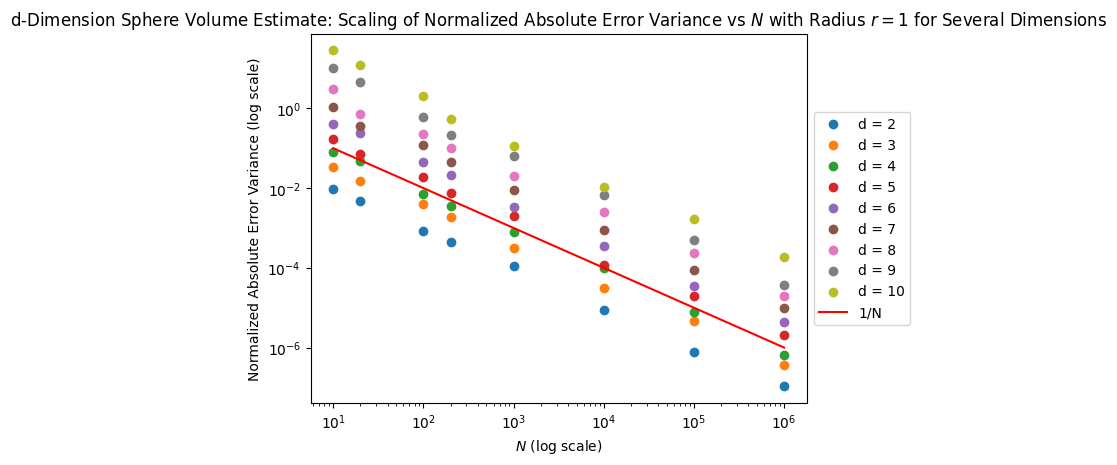

In [90]:
for i in range(9):
    plt.scatter(N, error_list[i+1], label="d = " + str(i+2))

plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (log scale)")
plt.ylabel("Normalized Absolute Error Variance (log scale)")
plt.title("d-Dimension Sphere Volume Estimate: Scaling of Normalized Absolute Error Variance vs $N$ with Radius $r = 1$ for Several Dimensions")

plt.plot(N, 1/np.array(N), label="1/N", color='r')    # comparing the variance trend with 1/N

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The $\log(\text{normalized absolute error variance})$ scales **linearly decreasing** with $\log(N)$.

It has the same trend as the $\frac{1}{N}$ line. So the Variance(normalized absolute error) ~ $\frac{1}{N}$. The error or the standard deviation is $\sqrt{\text{Variance(normalized absolute error)}}$ ~ $\frac{1}{\sqrt{N}}$.

But it looks like the error is increasing with the number of dimensions $d$. Let's plot normalized absolute error variance vs number of dimensions $d$.

In [92]:
N = 10**6
d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
radius = 1
iter = 100

var_error = []
for dimension in d:
     abs_error = np.abs(correct_volume[dimension-1] - np.array([estimate_d_ball_volume(N, dimension, radius) for i in range(iter)]))/np.abs(correct_volume[dimension-1])
     var_error += [np.var(abs_error)]


var_error

[0.0,
 9.493207181964521e-08,
 2.577830159243933e-07,
 8.466204165856998e-07,
 1.7248831053490187e-06,
 5.8243750043397e-06,
 8.59634838093494e-06,
 1.664834230423897e-05,
 5.636083730908329e-05,
 0.00014335554258310893,
 0.0003980087057899707,
 0.000993781231315877,
 0.0032930755673950566,
 0.015351601398481735,
 0.03612207627463966]

y = 0.00033269895692640436 * x^2 + -0.004012786606679093 * x + 0.008358662605434605


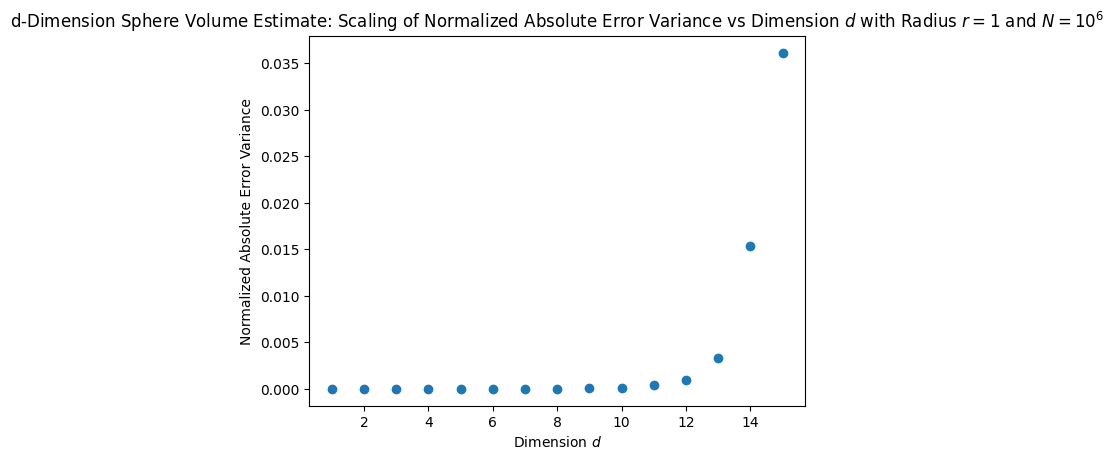

In [94]:
x = d
y = var_error
# define the estimate objective function (polynomial order-2)
def objective(x, a, b, c):
 return a*x**2 + b*x + c
# curve fit
popt, _ = opt.curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print(f"y = {a} * x^2 + {b} * x + {c}")
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x)+1, 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
#plt.plot(x_line, y_line, '--', color='red')

plt.xlabel("Dimension $d$")
plt.ylabel("Normalized Absolute Error Variance")
plt.title("d-Dimension Sphere Volume Estimate: Scaling of Normalized Absolute Error Variance vs Dimension $d$ with Radius $r = 1$ and $N = 10^6$")
plt.show()
plt.show()

The average absolute error scales **polynomially increasing** with $d$. Or maybe **exponential** :) <br>
The results obtained here can't be used to determine whether it is polynomial or exponential, need more points. <br>
But this can very well be exponential.

## Exercise 1.2: Importance Sampling with Monte Carlo

The goal of this exercise is to find a Monte Carlo estimate of $I=\int_{a=0}^{\infty} \mathrm{d} x \frac{\mathrm{e}^{-x}}{1+(x-1)^2}$. (It is fine to cut off the upper limit at some value e.g. $b=10$.)

a) Write a function that calculates $I$ by using that $I=\bar{f} \times(b-a)$ with $f(x)=$ $\frac{e^{-x}}{1+(x-1)^2}$. (You can find an estimate of $\bar{f}$ by uniformly generating some $x_i \in[a, b$ ) and averaging over $f\left(x_i\right)$.) Get an idea of the error of this estimate.

In [95]:
def func(x):
    return np.exp(-x)/(1 + (x-1)**2)

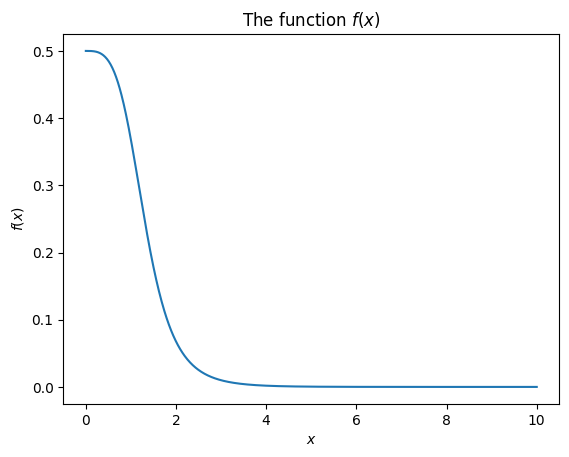

In [96]:
plt.plot(np.linspace(0, 10, 1000), func(np.linspace(0, 10, 1000)))
plt.title("The function $f(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

In [97]:
def integral_estimate(f, a, b, x):
    return np.average(f(x))*(b-a)

In [98]:
print(f"The estimate of I using uniform random distribution with N = 10^6 is {integral_estimate(func, 0, 10, 10*np.random.uniform(size=10**6))}.")

The estimate of I using uniform random distribution with N = 10^6 is 0.6957916002170789.


In [99]:
# the correct value for the integral from 0 to 10 (using wolfram alpha)
correct_value = 0.696091366457529

In [103]:
a = 0
b = 10
num_samples = [10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
iter = 100

abs_error = []
for n in num_samples:
    error = []
    for i in range(iter):
        x = b*np.random.uniform(size=n)
        error += [np.abs(integral_estimate(func, a, b, x) - correct_value)]
    abs_error += [np.average(error)]

In [104]:
abs_error_uniform_dist = abs_error

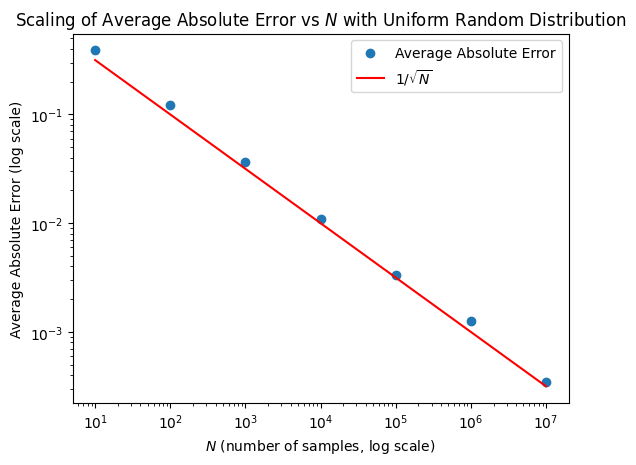

In [108]:
plt.scatter(num_samples, abs_error_uniform_dist, label="Average Absolute Error")
plt.plot(num_samples, 1/np.sqrt(np.array(num_samples)), label="$1/\sqrt{N}$", color='r')    # comparing the variance trend with 1/sqrt(N)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (number of samples, log scale)")
plt.ylabel("Average Absolute Error (log scale)")
plt.title("Scaling of Average Absolute Error vs $N$ with Uniform Random Distribution")

plt.legend()
plt.show()

The $\log(\text{average absolute error})$ scales **linearly decreasing** with $\log(\sqrt{N})$.

It has the same trend as the $\frac{1}{\sqrt{N}}$ line. So the absolute error ~ $\frac{1}{\sqrt{N}}$.

b) Now we will use importance sampling. The p.d.f. $g(x)=\alpha \mathrm{e}^{-\alpha x}$ with $\alpha \approx 1.46$ is a better choice than a uniform distribution. Use importance sampling to estimate $I$ over the same number of samples as in (a). How much did your result improve?

$$
\begin{aligned}
G(x) &=\int_{a=0}^{x} \mathrm{d} x' g(x') = \left.-e^{-\alpha x}\right]_{0}^{x} = -e^{-\alpha x} + 1 \\
G^{-1}(x) &= \frac{-\ln(-x + 1)}{\alpha}
\end{aligned}
$$

Producing the samples by "inverting" the function.

In [109]:
def g(x, alpha):
    
    return alpha*np.exp(-alpha*x)

In [110]:
def G_inverse(x, alpha):

    return -np.log(-x + 1)/alpha

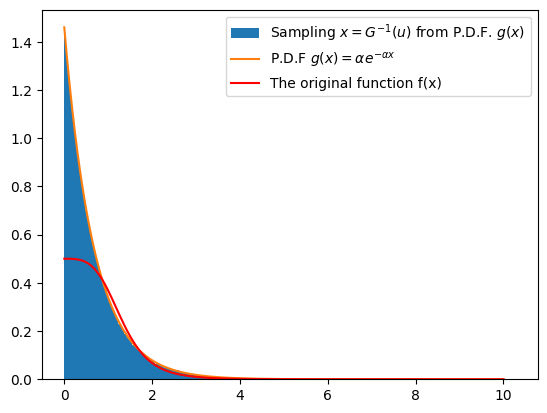

In [111]:
alpha = 1.46
N = 10**6
u = np.random.uniform(size=N)
x = G_inverse(u, alpha)

H = plt.hist(x, 1000, density=True, label="Sampling $x = G^{-1}(u)$ from P.D.F. $g(x)$")
P = plt.plot(np.linspace(0, 10, 1000), g(np.linspace(0, 10, 1000), alpha), label="P.D.F $g(x)=α e^{-α x}$")
F = plt.plot(np.linspace(0, 10, 1000), func(np.linspace(0, 10, 1000)), label="The original function f(x)", color="red")
plt.legend()
plt.show()

In [112]:
def importance_sampling_integral_estimate(f, a, b, x, g, alpha):
    return np.average(f(x)/g(x, alpha))*(b-a)/10 # TODO: derrive by hand later

In [113]:
alpha = 1.46
a = 0
b = 10
num_samples = [10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
iter = 100

abs_error = []
for n in num_samples:
    error = []
    for i in range(iter):
        u = np.random.uniform(size=n)
        x = G_inverse(u, alpha)
        error += [abs(importance_sampling_integral_estimate(func, a, b, x, g, alpha)- correct_value)]
    abs_error += [np.average(error)]

abs_error_importance_sampling = abs_error

In [114]:
abs_error_uniform_dist, abs_error_importance_sampling

([0.3888112972759664,
  0.12174628492635596,
  0.03650437790141828,
  0.01090281259732328,
  0.0033216244711241037,
  0.0012487146439530438,
  0.0003439674113880919],
 [0.06555639584541871,
  0.022146475406929343,
  0.006913894642988531,
  0.001954304057054266,
  0.000662146583817339,
  0.00021204720473556483,
  6.365986985338413e-05])

The absolute error improves roughly by about 1 order of magnitude (10x).

Comparison

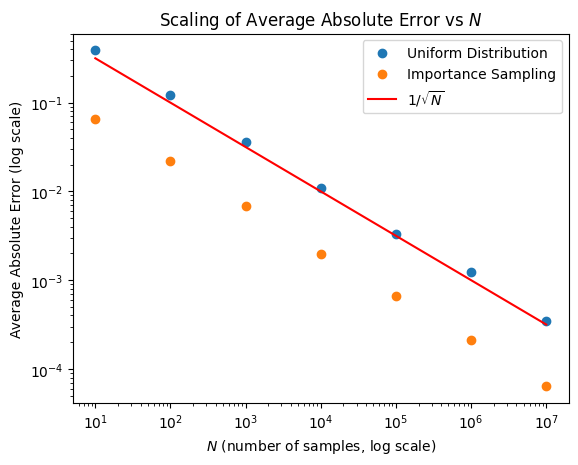

In [115]:
plt.scatter(num_samples, abs_error_uniform_dist, label="Uniform Distribution")
plt.scatter(num_samples, abs_error_importance_sampling, label="Importance Sampling")
plt.plot(num_samples, 1/np.sqrt(np.array(num_samples)), label="$1/\sqrt{N}$", color='r')    # comparing the variance trend with 1/sqrt(N)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (number of samples, log scale)")
plt.ylabel("Average Absolute Error (log scale)")
plt.title("Scaling of Average Absolute Error vs $N$")
plt.legend()
plt.show()

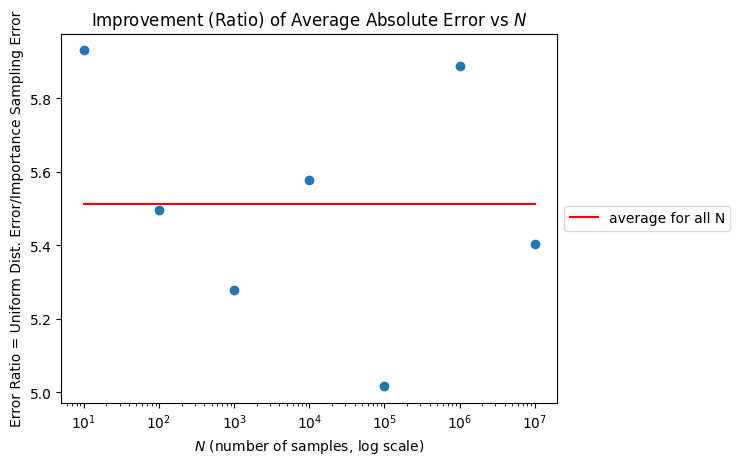

In [125]:
plt.scatter(num_samples, np.array(abs_error_uniform_dist)/np.array(abs_error_importance_sampling))
plt.plot(num_samples, [np.average(np.array(abs_error_uniform_dist)/np.array(abs_error_importance_sampling)) for i in num_samples], color='r', label="average for all N")
#plt.yscale("log")
plt.xscale("log")
plt.xlabel("$N$ (number of samples, log scale)")
plt.ylabel("Error Ratio = Uniform Dist. Error/Importance Sampling Error")
plt.title("Improvement (Ratio) of Average Absolute Error vs $N$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Exercise 1.3: Metropolis Algorithm for the 2D Ising Model

Download the script metropolis.py from the Gitlab, which implements the Metropolis algorithm for the classical 2D Ising model $H=-J \sum_{\langle i, j\rangle} \sigma_i \sigma_j$ with $J \equiv 1$. The 2D Ising model has a critical point at $T_c=2 J / \ln (1+\sqrt{2}) \approx 2.269$.

a) What is the script plotting?

The average specific heat $C_V$ (with its std dev as the error bar) vs temperature $T$.

b) What are "typical" configurations at temperatures $T \gg T_c, T \approx T_c$ and $T \ll T_c$ ?

In [126]:
# Adapted from the given metropolis.py

def calc_C_and_E(L, T_range = np.arange(1.5, 3.1, 0.1), N_sweeps = 5000, N_eq = 1000, N_flips = 10, N_bins = 10):

    C_list = []
    E_list = []
    system = prepare_system(L)

    for T in T_range:
        C_list_bin = []
        E_list_bin = []
        for k in range(N_bins):
            Es = metropolis_loop(system, T, N_sweeps, N_eq, N_flips)

            mean_E = np.mean(Es)
            mean_E2 = np.mean(Es**2)

            C_list_bin.append(1. / T**2. / L**2. * (mean_E2 - mean_E**2))
            E_list_bin.append(mean_E)
            
        C_list.append([np.mean(C_list_bin), np.std(C_list_bin) / np.sqrt(N_bins)])
        E_list.append([np.mean(E_list_bin), np.std(E_list_bin) / np.sqrt(N_bins)])

        print(T, mean_E, C_list[-1])
    
    return C_list, E_list

1.5 -31.016 [0.19331733333333306, 0.022117717956447996]
1.6 -31.104 [0.2478150000000004, 0.02697258662346184]
1.7000000000000002 -30.2 [0.3711025605536335, 0.030691470908712958]
1.8000000000000003 -29.816 [0.4248622222222216, 0.03825070071838351]
1.9000000000000004 -28.464 [0.45922315789473683, 0.036960597850739636]
2.0000000000000004 -28.296 [0.5521472999999997, 0.03840338999178343]
2.1000000000000005 -25.784 [0.6550732879818594, 0.05600591943987143]
2.2000000000000006 -27.264 [0.7462852892561979, 0.0350775663933175]
2.3000000000000007 -25.44 [0.7701606049149327, 0.034914905854321734]
2.400000000000001 -23.344 [0.8069131944444438, 0.028240815077239804]
2.500000000000001 -22.52 [0.8006721919999993, 0.03212857636149785]
2.600000000000001 -21.92 [0.7845872189349106, 0.01862761517160878]
2.700000000000001 -17.952 [0.729803566529492, 0.01740972183896062]
2.800000000000001 -20.392 [0.7033114795918362, 0.009012313433337228]
2.9000000000000012 -17.872 [0.6643445897740778, 0.00923242203924603]

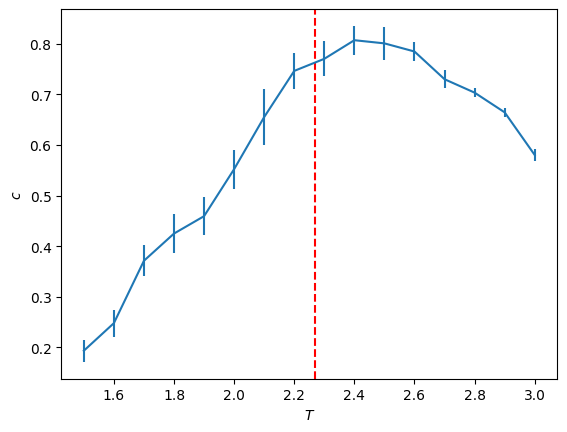

In [128]:
# Plot the results
C_list, _ = calc_C_and_E(L=4)
C_list = np.array(C_list)
T_range = np.arange(1.5, 3.1, 0.1)

plt.errorbar(T_range, C_list[:, 0], C_list[:, 1])

Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$c$')
plt.show()

$$
T \ll T_c: \text{$c$ is linearly increasing with $T$.} \\
T \approx T_c: \text{The peak/turning point.} \\
T \gg T_c: \text{$c$ is linearly decreasing with $T$}.
$$

c) Plot the energy $E$ and specific heat $C_V$ versus temperature $T$ for different system sizes $L$.

2.269185314213022
1.5 -7.824 [0.16475306666666673, 0.01730651607481134]
1.6 -7.6 [0.24075249999999998, 0.017375280375435665]
1.7000000000000002 -7.552 [0.28637453287197234, 0.013122630888718661]
1.8000000000000003 -7.568 [0.26916345679012343, 0.019434394520762923]
1.9000000000000004 -7.152 [0.37235412742382257, 0.014720220339895477]
2.0000000000000004 -7.008 [0.38945759999999974, 0.01619138598835813]
2.1000000000000005 -7.008 [0.36073360544217664, 0.012982260927112188]
2.2000000000000006 -6.8 [0.36313123966942135, 0.014531054245106109]
2.3000000000000007 -6.656 [0.40613504725897903, 0.009084113756277072]
2.400000000000001 -6.672 [0.3871833333333331, 0.007121850961029083]
2.500000000000001 -6.544 [0.41883135999999965, 0.005731114807541015]
2.600000000000001 -6.448 [0.41552284023668606, 0.010173746594009101]
2.700000000000001 -6.16 [0.4116323731138542, 0.007613356743658838]
2.800000000000001 -5.888 [0.40019918367346907, 0.008335884717742235]
2.9000000000000012 -5.68 [0.3936540309155764, 

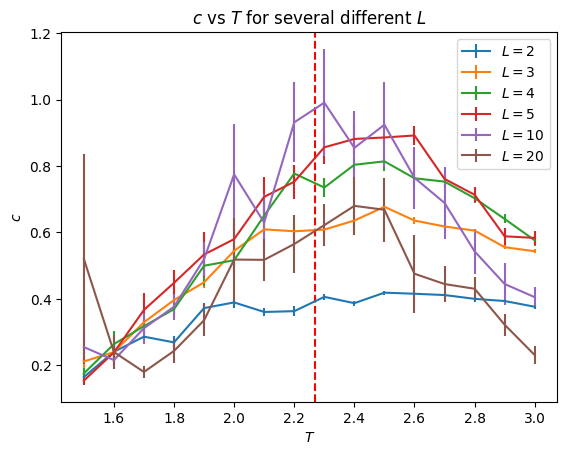

In [35]:
Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

L = [2, 3, 4, 5, 10, 20]

for l in L:
    C_list, _ = calc_C_and_E(L=l)
    C_list = np.array(C_list)

    plt.errorbar(T_range, C_list[:, 0], C_list[:, 1], label="$L = " + str(l) + "$")

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$c$')
plt.title("$c$ vs $T$ for several different $L$")
plt.legend()
plt.show()

2.269185314213022
1.5 -7.792 [0.1660302222222223, 0.018671552999399425]
1.6 -7.456 [0.21822499999999997, 0.024062141945387965]
1.7000000000000002 -7.632 [0.2812257439446367, 0.01629475813096541]
1.8000000000000003 -7.472 [0.3093550617283948, 0.01960171540757789]
1.9000000000000004 -7.2 [0.3331616620498613, 0.016031871500932365]
2.0000000000000004 -7.04 [0.3764975999999999, 0.015382368787153693]
2.1000000000000005 -7.088 [0.37920943310657573, 0.013675570835053068]
2.2000000000000006 -7.152 [0.37880595041322296, 0.01766752652356377]
2.3000000000000007 -6.64 [0.404962722117202, 0.01632540496912903]
2.400000000000001 -6.736 [0.4100644444444443, 0.007699243316996848]
2.500000000000001 -6.352 [0.4167864319999997, 0.010069927781919862]
2.600000000000001 -6.288 [0.43237301775147896, 0.008302505079611076]
2.700000000000001 -5.744 [0.42199528120713276, 0.007814923003445806]
2.800000000000001 -6.048 [0.4141967346938773, 0.005507637249459778]
2.9000000000000012 -5.904 [0.3874800475624253, 0.008181

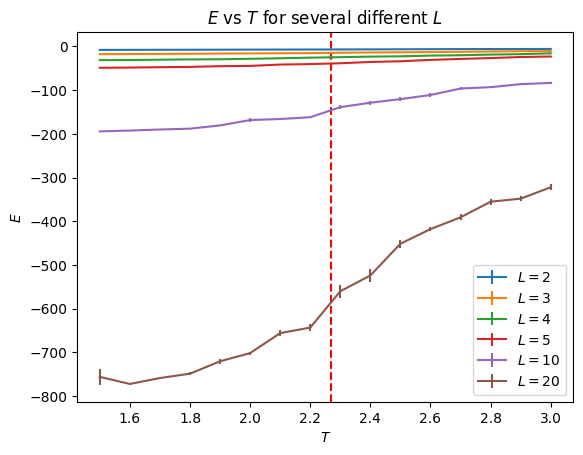

In [36]:
Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

L = [2, 3, 4, 5, 10, 20]

for l in L:
    _, E_list = calc_C_and_E(L=l)
    E_list = np.array(E_list)

    plt.errorbar(T_range, E_list[:, 0], E_list[:, 1], label="$L = " + str(l) + "$")

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$E$')
plt.title("$E$ vs $T$ for several different $L$")
plt.legend()
plt.show()

d) Adjust the script to measure the magnetization $M=\frac{1}{L^2} \sum_i \sigma_i$. Plot how $M$ changes with simulation time (=the number of updates performed) for $T>T_c, T \approx T_c$ and $T<T_c$. Which time scales can you recognize? In which cases do you still get the correct expectation value $\langle M\rangle=0$ ? Plot $\langle|M|\rangle$ (i.e. taking the absolute value of $M$ before averaging) versus $T$ to see the transition.

In [183]:
def magnetization(system, i, j, L_square):

    return system[i,j]/L_square

def measure_magnetization(system, L_square, absolute=False):

    L = system.shape[0]
    M = 0
    for i in range(L):
        for j in range(L):
            if absolute == False:
                M += abs(magnetization(system, i, j, L_square))
            else:
                M += magnetization(system, i, j, L_square)
    return M


In [184]:
# TODO
# Adapted from the given metropolis.py

def metropolis_loop_magnetization(system, L_square, T, N_sweeps, N_eq, N_flips, absolute=False):
    """ Main loop doing the Metropolis algorithm."""
    # initial energy of the system
    M = measure_magnetization(system, L_square, absolute)

    # size of the lattice (number of sites in one dimension)
    L = system.shape[0]
    
    M_list = []
    for step in range(N_sweeps + N_eq):
        # pick one random lattice site coordinate (i,j)
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)

        # calculate the magnetization difference (after flip - before flip)
        M0 = magnetization(system, i, j, L_square)
        sys_temp = system.copy()
        sys_temp[i,j] *= -1
        M1 = magnetization(sys_temp, i, j, L_square)
        dM = M1 - M0

        if dM <= 0.:
            # if magnetization difference < 0 -> flip the spin
            system[i, j] *= -1
            # new magnetization of the system after the spin on site (i,j) got flipped
            M += dM
        elif np.exp(-1. / T * dM) > np.random.rand():
            # else (if magnetization difference > 0), flip the spin on site (i,j) with probability exp(-beta dE/T)
            system[i, j] *= -1
            # new magnetization of the system after the spin on site (i,j) got flipped
            M += dM

        if step >= N_eq and np.mod(step, N_flips) == 0:
            # measurement
            M_list.append(M)

    # the energy of the system from every measurement
    return np.array(M_list)

In [185]:
# TODO
# Adapted from the given metropolis.py

def calc_M(L, L_square, T_range = np.arange(1.5, 3.1, 0.1), N_sweeps = 5000, N_eq = 1000, N_flips = 10, N_bins = 10, absolute=False):

    M_list = []
    system = prepare_system(L)

    for T in T_range:
        M_list_bin = []
        for k in range(N_bins):
            Ms = metropolis_loop_magnetization(system, L_square, T, N_sweeps, N_eq, N_flips, absolute=absolute)

            mean_M = np.mean(Ms)
            mean_M2 = np.mean(Ms**2)

            M_list_bin.append(mean_M)
            
        M_list.append([np.mean(M_list_bin), np.std(M_list_bin) / np.sqrt(N_bins)])

        print(T, mean_M)
    
    return M_list

1.5 1.2175
1.6 1.08375
1.7000000000000002 0.589
1.8000000000000003 1.22775
1.9000000000000004 1.0815
2.0000000000000004 0.969
2.1000000000000005 0.82625
2.2000000000000006 1.3495
2.3000000000000007 0.588
2.400000000000001 0.965
2.500000000000001 0.98175
2.600000000000001 0.96325
2.700000000000001 0.8355
2.800000000000001 0.8345
2.9000000000000012 0.87075
3.0000000000000013 1.2435
1.5 0.58425
1.6 1.0895
1.7000000000000002 1.218
1.8000000000000003 1.21125
1.9000000000000004 1.32775
2.0000000000000004 0.82775
2.1000000000000005 1.07
2.2000000000000006 1.22625
2.3000000000000007 0.5995
2.400000000000001 1.33275
2.500000000000001 0.98375
2.600000000000001 1.21775
2.700000000000001 1.09825
2.800000000000001 1.122
2.9000000000000012 1.09525
3.0000000000000013 0.7345
1.5 1.09175
1.6 0.98175
1.7000000000000002 0.85325
1.8000000000000003 1.101
1.9000000000000004 1.20825
2.0000000000000004 1.08775
2.1000000000000005 0.86725
2.2000000000000006 1.21425
2.3000000000000007 0.9815
2.400000000000001 0.

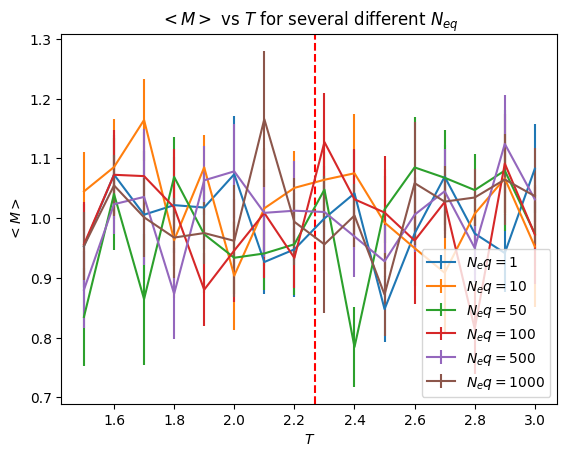

In [186]:
# Plot the results
N_eq = [1, 10, 50, 100, 500, 1000]
for neq in N_eq:
    M_list = calc_M(L=4, L_square=16, N_eq=neq)
    M_list = np.array(M_list)
    plt.errorbar(T_range, M_list[:, 0], M_list[:, 1], label="${N_eq} = " + str(neq) + "$")

Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$<M>$')
plt.title("$<M>$ vs $T$ for several different $N_{eq}$")
plt.legend()
plt.show()

1.5 -0.01525
1.6 -0.048
1.7000000000000002 -0.03275
1.8000000000000003 -0.03225
1.9000000000000004 -0.02425
2.0000000000000004 -0.04175
2.1000000000000005 -0.048
2.2000000000000006 -0.03475
2.3000000000000007 -0.039
2.400000000000001 0.00975
2.500000000000001 -0.056
2.600000000000001 -0.0115
2.700000000000001 -0.019
2.800000000000001 -0.0315
2.9000000000000012 0.007
3.0000000000000013 -0.0345
1.5 -0.049
1.6 -0.043
1.7000000000000002 -0.03
1.8000000000000003 -0.03025
1.9000000000000004 -0.03025
2.0000000000000004 -0.054
2.1000000000000005 -0.018
2.2000000000000006 -0.04575
2.3000000000000007 -0.048
2.400000000000001 -0.039
2.500000000000001 -0.01825
2.600000000000001 -0.0245
2.700000000000001 -0.01275
2.800000000000001 -0.013
2.9000000000000012 -0.032
3.0000000000000013 -0.01225
1.5 -0.04475
1.6 -0.05475
1.7000000000000002 -0.02575
1.8000000000000003 -0.05775
1.9000000000000004 -0.0415
2.0000000000000004 -0.03225
2.1000000000000005 -0.0255
2.2000000000000006 -0.01075
2.3000000000000007 

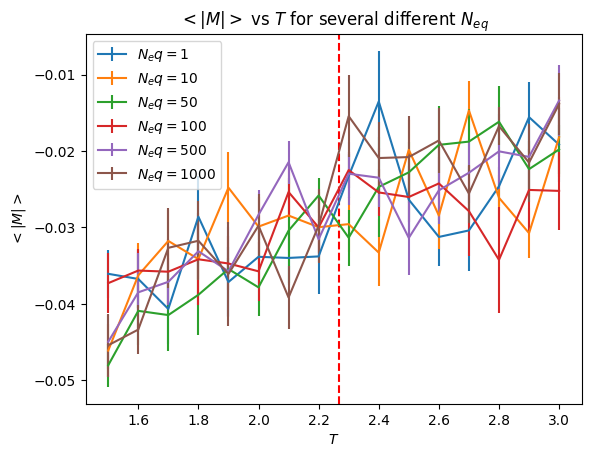

In [187]:
# Plot the results
N_eq = [1, 10, 50, 100, 500, 1000]
for neq in N_eq:
    M_list = calc_M(L=4, L_square=16, N_eq=neq, absolute=True)
    M_list = np.array(M_list)
    plt.errorbar(T_range, M_list[:, 0], M_list[:, 1], label="${N_eq} = " + str(neq) + "$")

Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$<|M|>$')
plt.title("$<|M|>$ vs $T$ for several different $N_{eq}$")
plt.legend()
plt.show()

e) Include a magnetic field $h$ coupling to the spins with a term $H^{\prime}=-h \sum_i \sigma_i$. Plot $\langle M\rangle$ versus $T$.

Adding coupling term $H'$ is equivalent to changing the $L^2$ into $L'^2$ where $\frac{1}{L'^2} = \frac{1-hL^2}{L^2}$, $L'^2 = \frac{L^2}{1-hL^2}$.

1.5 -3.555
1.6 -7.6575
1.7000000000000002 -3.62625
1.8000000000000003 -0.81375
1.9000000000000004 -2.32125
2.0000000000000004 -0.34875
2.1000000000000005 -1.515
2.2000000000000006 0.42375
2.3000000000000007 0.81375
2.400000000000001 -4.71375
2.500000000000001 -3.58125
2.600000000000001 0.01125
2.700000000000001 -0.765
2.800000000000001 -2.895
2.9000000000000012 -3.04875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3.0000000000000013 -4.6125
2.269185314213022


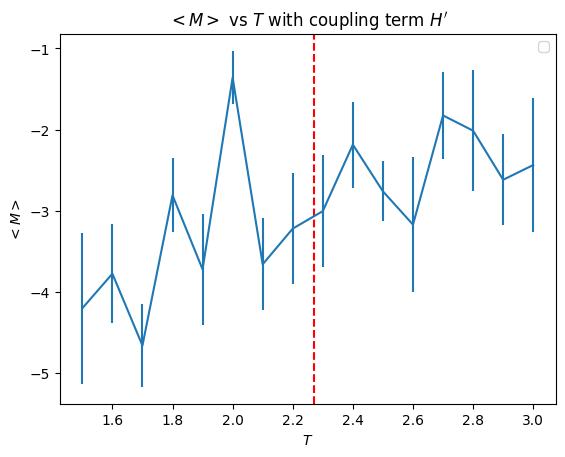

In [167]:
# Plot the results
L = 4
h = 1
L_square = L**2/(1 - h*(L**2))
N_eq = [1000]
for neq in N_eq:
    M_list = calc_M(L=L, L_square=L_square, N_eq=neq)
    M_list = np.array(M_list)
    plt.errorbar(T_range, M_list[:, 0], M_list[:, 1])

Tc = 2. / np.log(1. + np.sqrt(2))
print(Tc)

plt.axvline(Tc, color='r', linestyle='--')
plt.xlabel('$T$')
plt.ylabel('$<M>$')
plt.title("$<M>$ vs $T$ with coupling term $H'$")
plt.legend()
plt.show()